# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [928]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip


'\n# Here is a helping code that will download and unzip the dataset for you.\n# Once you download the dataset you may comment the code!\n!kaggle datasets download -d khaledzsa/traffic-dataset\n!unzip traffic-dataset.zip\n'

In [929]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import LSTM

In [930]:
df=pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'],dayfirst=True)

<ipython-input-930-3653698d39a6>:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df=pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'],dayfirst=True)


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [931]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [932]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
traffic_volume,19980.0,3278.186887,113.0,1228.75,3430.0,4928.0,16781.0,1977.171357
temp,20000.0,281.16268,243.39,271.95,281.825,291.84,310.07,12.661288
rain_1h,20000.0,0.048396,0.0,0.0,0.0,0.0,10.6,0.398007
snow_1h,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,20000.0,49.3846,0.0,1.0,75.0,90.0,92.0,39.647341
date_time,20000,2017-10-22 04:13:17.939999744,2016-11-18 15:00:00,2017-04-30 14:45:00,2017-10-21 07:30:00,2018-04-13 21:00:00,2018-09-30 23:00:00,NaN


In [933]:
df.shape

(20000, 8)

In [934]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,datetime64[ns]


In [935]:
columns=df.columns.tolist()

<Axes: xlabel='clouds_all'>

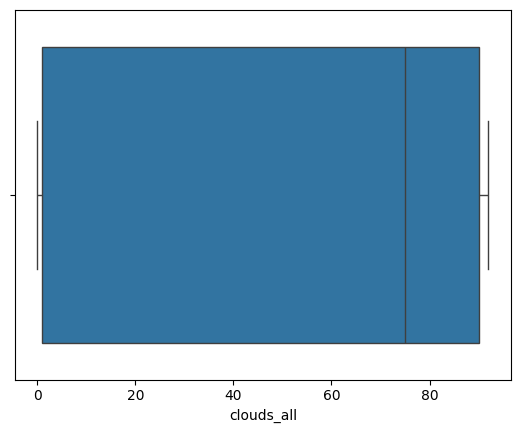

In [936]:
sns.boxplot(df,x='clouds_all')

<Axes: xlabel='traffic_volume'>

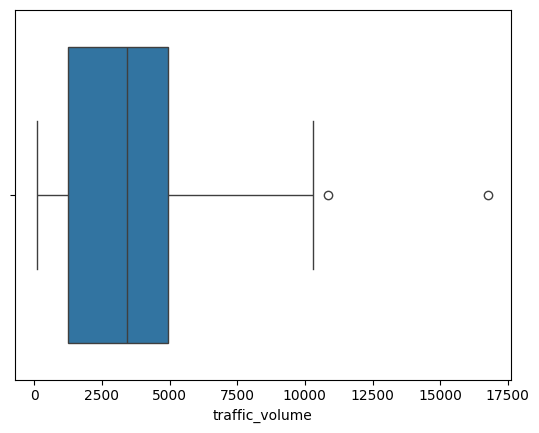

In [937]:
sns.boxplot(df,x='traffic_volume')  #potential outlier

In [938]:
import matplotlib.pyplot as plt

In [939]:
columns=df.columns.tolist()
columns.remove('date_time')
for i in columns:
  df.plot(x='date_time', y=i)
  plt.show()


"\ncolumns=df.columns.tolist()\ncolumns.remove('date_time')\nfor i in columns:\n  df.plot(x='date_time', y=i)\n  plt.show()\n  "

In [940]:
num=df
num.drop(columns=['weather_main','weather_description'])

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
0,1209.0,291.15,0.0,0.0,90,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,2017-11-09 15:00:00
...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,2018-02-12 15:00:00


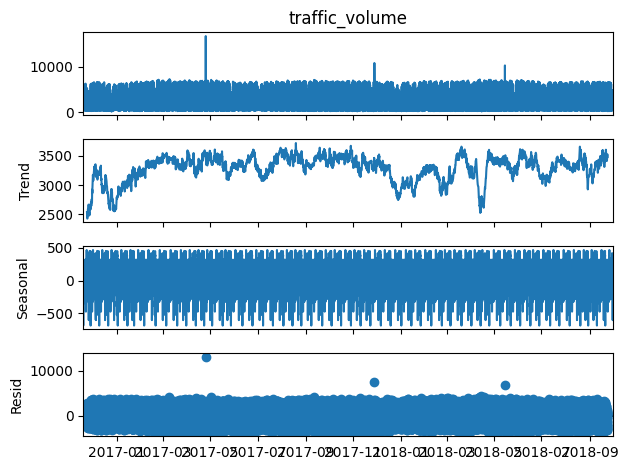

In [984]:
result = seasonal_decompose(df['traffic_volume'].dropna(),
                            model ='additive',period=365)

result.plot()
plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [942]:
'''
df=df.set_index('date_time')
df=df.asfreq('M')
data=df.resample('M').mean()
'''

"\ndf=df.set_index('date_time')\ndf=df.asfreq('M')\ndata=df.resample('M').mean()\n"

In [943]:
df=df.set_index('date_time')

In [944]:
df=df.sort_index()

In [945]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [946]:
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

<ipython-input-946-e3baad1f7273>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)
<ipython-input-946-e3baad1f7273>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [947]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [948]:
df.duplicated().sum()

19

In [949]:
#i will be removing duplicates

df.drop_duplicates(inplace=True)

In [950]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df['weather_main']=encoder.fit_transform(df['weather_main'])

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [951]:
#df=df.resample('M').mean()

In [952]:
df.drop(columns='weather_description',inplace=True)

In [953]:
df['prev_traffic_volume']=df['traffic_volume'].shift(1)

In [954]:
df['diff_traffic_volume']=df['traffic_volume'].diff()

In [955]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,prev_traffic_volume,diff_traffic_volume
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4872.0,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,4872.0,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4872.0,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,5074.0,0.0
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,3947.0,-404.0
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,3543.0,-762.0
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,2781.0,-622.0


In [956]:
df.shape

(19981, 8)

In [957]:
df['day_of_week']=df.index.day_of_week
df['Month']=df.index.month
df['day_of_year']=df.index.day_of_year

In [958]:
df.dropna(inplace=True)

In [959]:
df.shape

(19980, 11)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [960]:
split_index=int(len(df)*0.8)
train_data=df.iloc[:split_index]
test_data=df.iloc[split_index:]

In [961]:
test_data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,prev_traffic_volume,diff_traffic_volume,day_of_week,Month,day_of_year
date_time,,,,,,,,,,,
2018-05-19 04:00:00,477.0,291.00,0.0,0.0,1,6,494.0,-17.0,5,5,139
2018-05-19 05:00:00,806.0,289.35,0.0,0.0,1,0,477.0,329.0,5,5,139
2018-05-19 06:00:00,1430.0,288.94,0.0,0.0,75,4,806.0,624.0,5,5,139
2018-05-19 07:00:00,2062.0,287.75,0.0,0.0,1,5,1430.0,632.0,5,5,139
2018-05-19 08:00:00,3277.0,287.42,0.0,0.0,90,4,2062.0,1215.0,5,5,139
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,1,3947.0,-404.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,1,3543.0,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,9,2781.0,-622.0,6,9,273


In [962]:
train_data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,prev_traffic_volume,diff_traffic_volume,day_of_week,Month,day_of_year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,5074.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,8,5074.0,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 23:00:00,1797.0,295.37,0.0,0.0,1,0,2728.0,-931.0,4,5,138
2018-05-19 00:00:00,1420.0,294.62,0.0,0.0,90,6,1797.0,-377.0,5,5,139
2018-05-19 01:00:00,855.0,293.51,0.0,0.0,75,6,1420.0,-565.0,5,5,139


In [963]:
train_data.shape,test_data.shape

((15984, 11), (3996, 11))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [964]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

train_data_scaled=scaler.fit_transform(train_data)

test_data_scaled=scaler.transform(test_data)

In [965]:
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns, index=train_data.index)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns, index=test_data.index)

In [966]:
n_past = 5

X_train, y_train = [], []
for i in range(n_past, len(train_data_scaled)):
    X_train.append(train_data_scaled.iloc[i - n_past:i, 0].values)
    y_train.append(train_data_scaled.iloc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_test, y_test = [], []
for i in range(n_past, len(test_data_scaled)):

    X_test.append(test_data_scaled.iloc[i - n_past:i, 0].values)
    y_test.append(test_data_scaled.iloc[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [967]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [968]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)  #tried it but didnt improve the model

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [969]:
#RNN Model

from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [970]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_33 (SimpleRNN)            │ (None, 5, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_34 (SimpleRNN)            │ (None, 5, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_35 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [971]:
history=model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=7)

Epoch 1/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - loss: 0.5443 - val_loss: 0.0771
Epoch 2/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1225 - val_loss: 0.0682
Epoch 3/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1098 - val_loss: 0.0663
Epoch 4/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0987 - val_loss: 0.0640
Epoch 5/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0986 - val_loss: 0.0631
Epoch 6/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0915 - val_loss: 0.0608
Epoch 7/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0875 - val_loss: 0.0710


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [972]:
predictions=model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [973]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(predictions,y_test)
mea=mean_absolute_error(predictions,y_test)

mse,mea


(0.07097340458502795, 0.198935388971458)

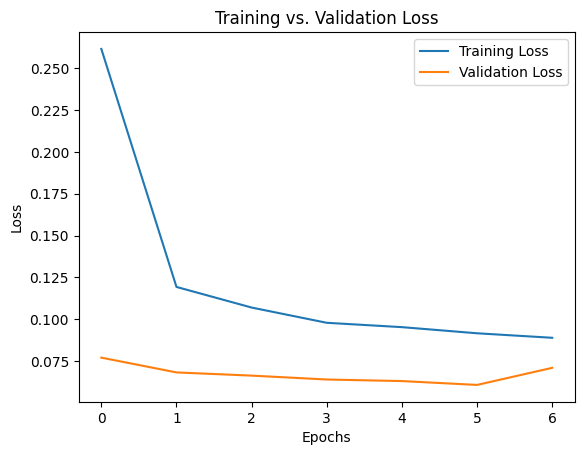

In [974]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

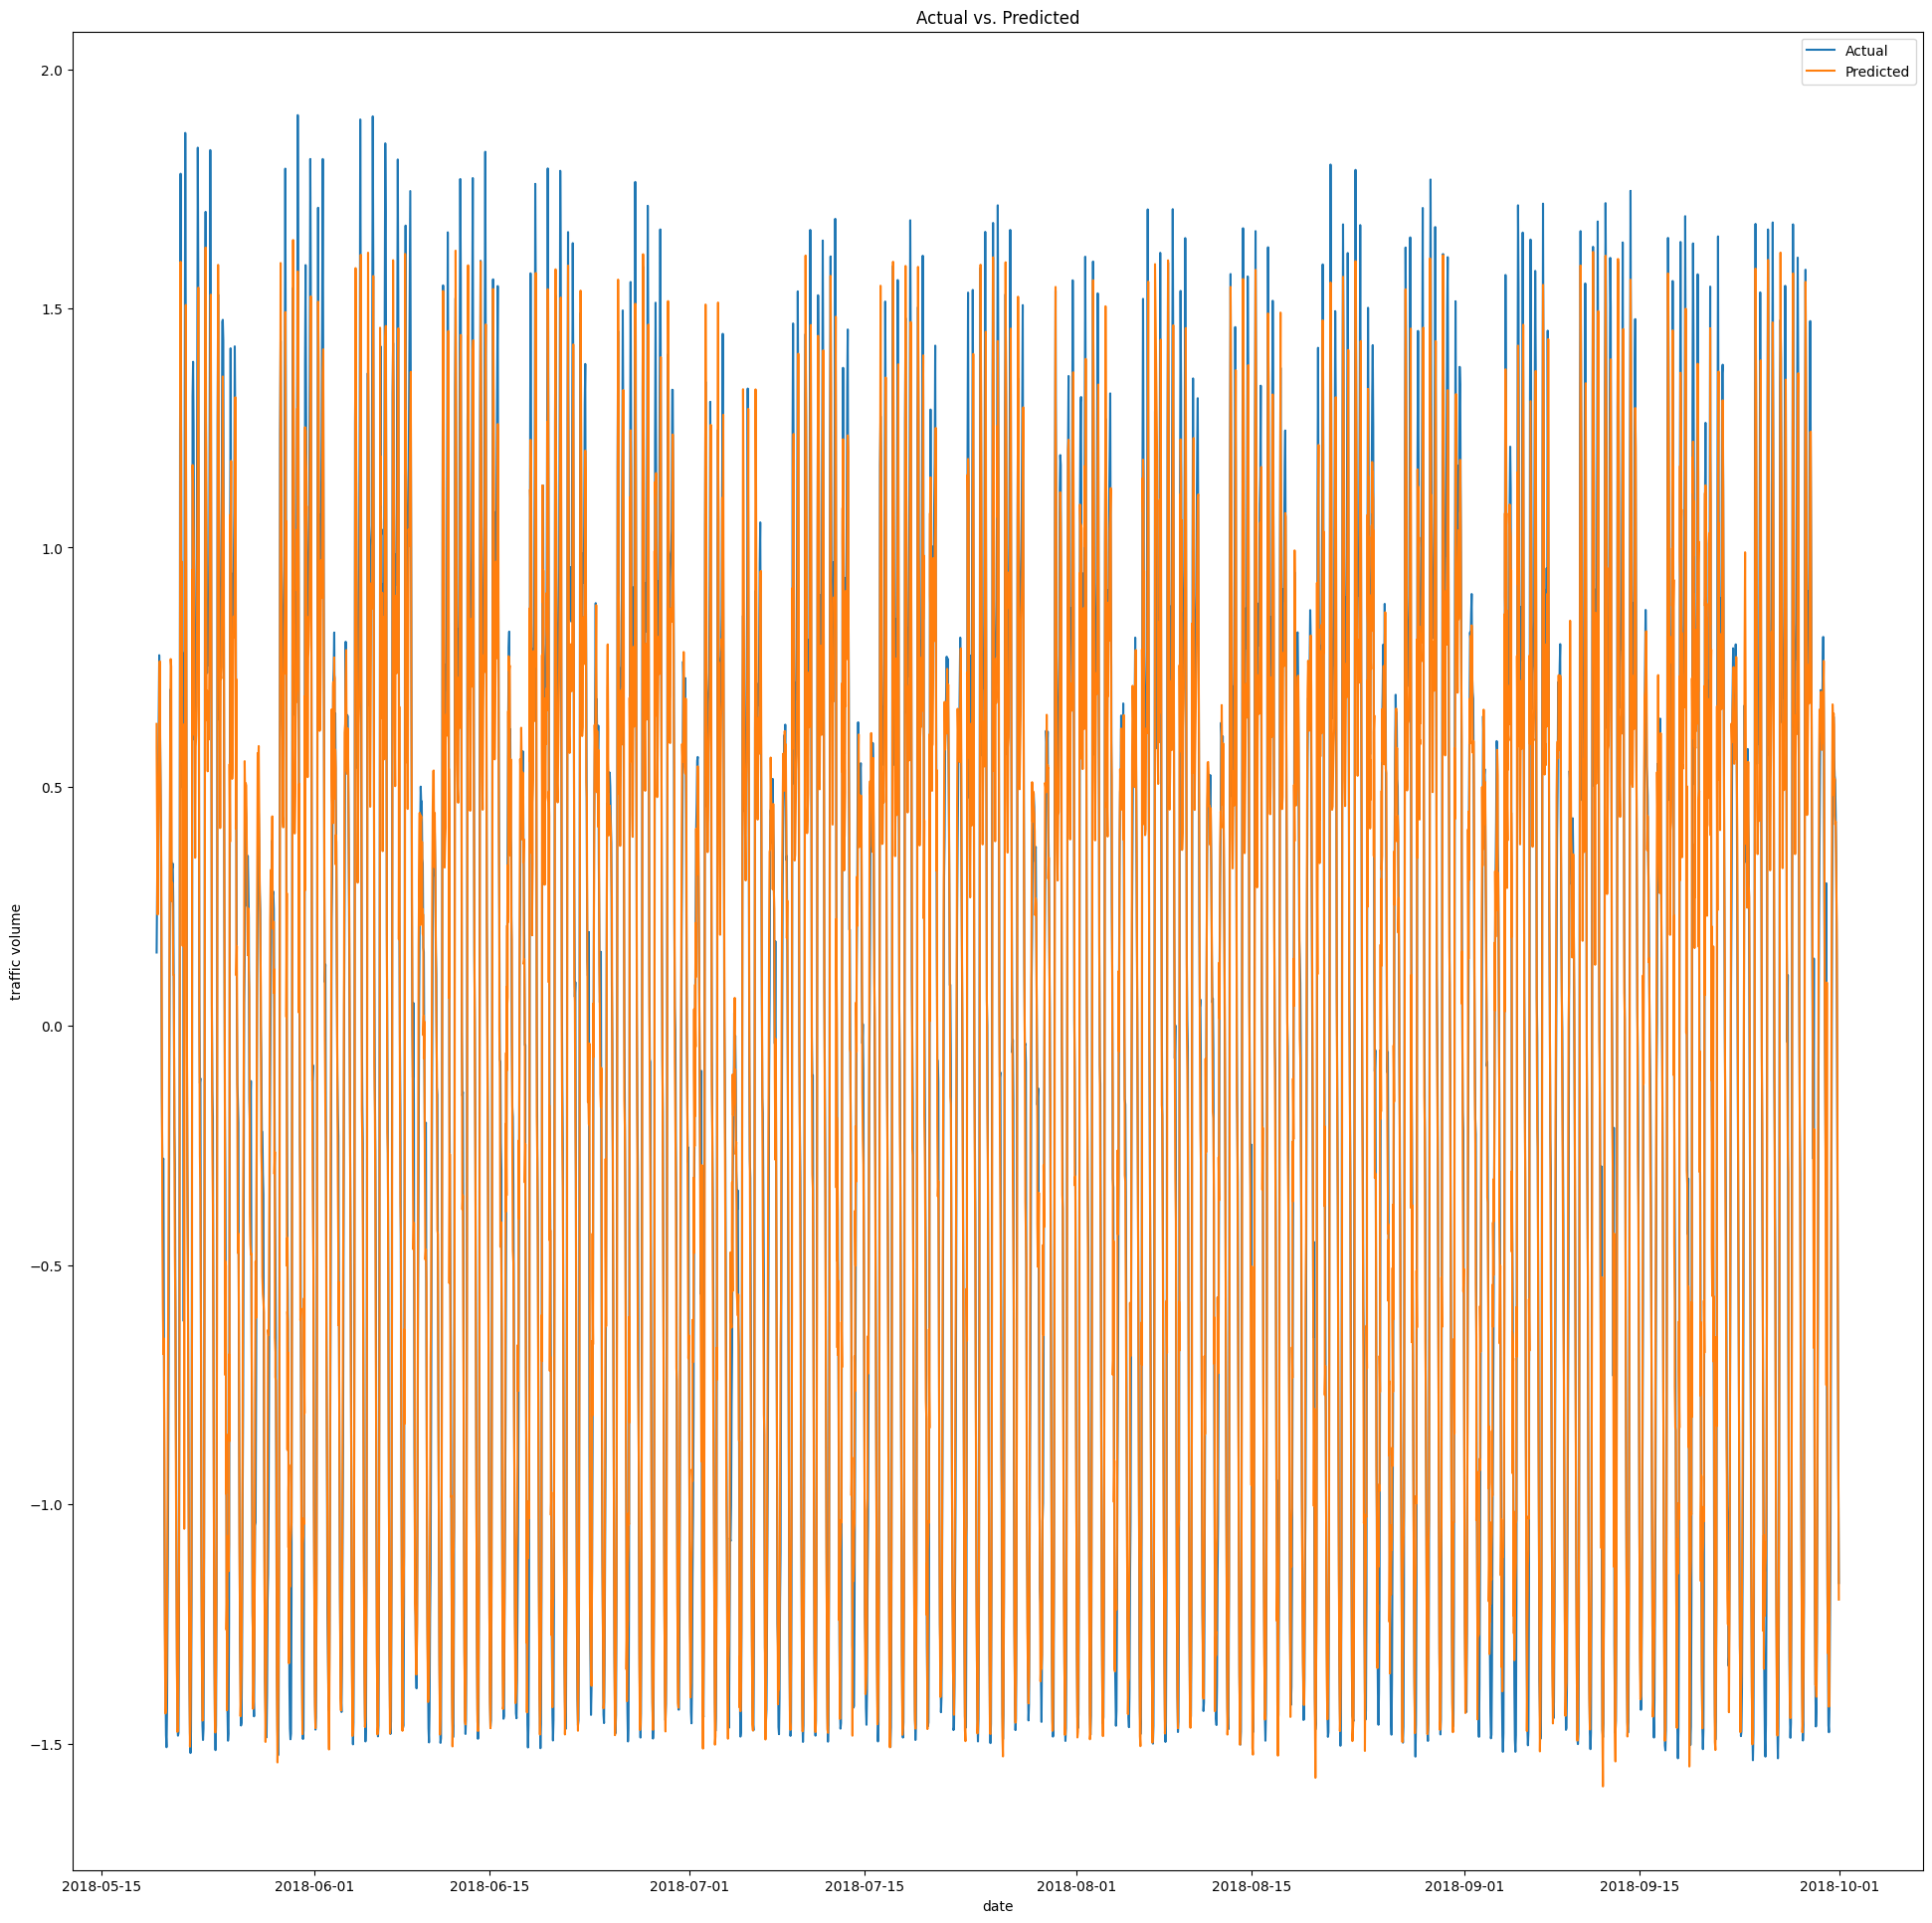

In [975]:
plt.figure(figsize=(24,24))
plt.plot(test_data.index[n_past:], y_test, label='Actual')
plt.plot(test_data.index[n_past:], predictions, label='Predicted')
plt.xlabel('date')
plt.ylabel('traffic volume')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [976]:
#LSTM Model
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=50, return_sequences=True))
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [977]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [978]:
history2=model2.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=7)

Epoch 1/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.6253 - val_loss: 0.1061
Epoch 2/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1216 - val_loss: 0.0706
Epoch 3/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1046 - val_loss: 0.0649
Epoch 4/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0905 - val_loss: 0.0634
Epoch 5/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0829 - val_loss: 0.0618
Epoch 6/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0845 - val_loss: 0.0589
Epoch 7/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0748 - val_loss: 0.0573


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [979]:
pred=model2.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [980]:
mse=mean_squared_error(pred,y_test)
mea=mean_absolute_error(pred,y_test)

mse,mea

(0.0573345668458942, 0.16719538128830919)

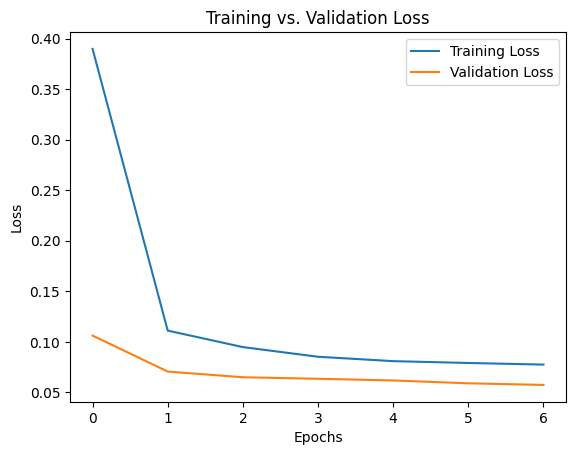

In [981]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

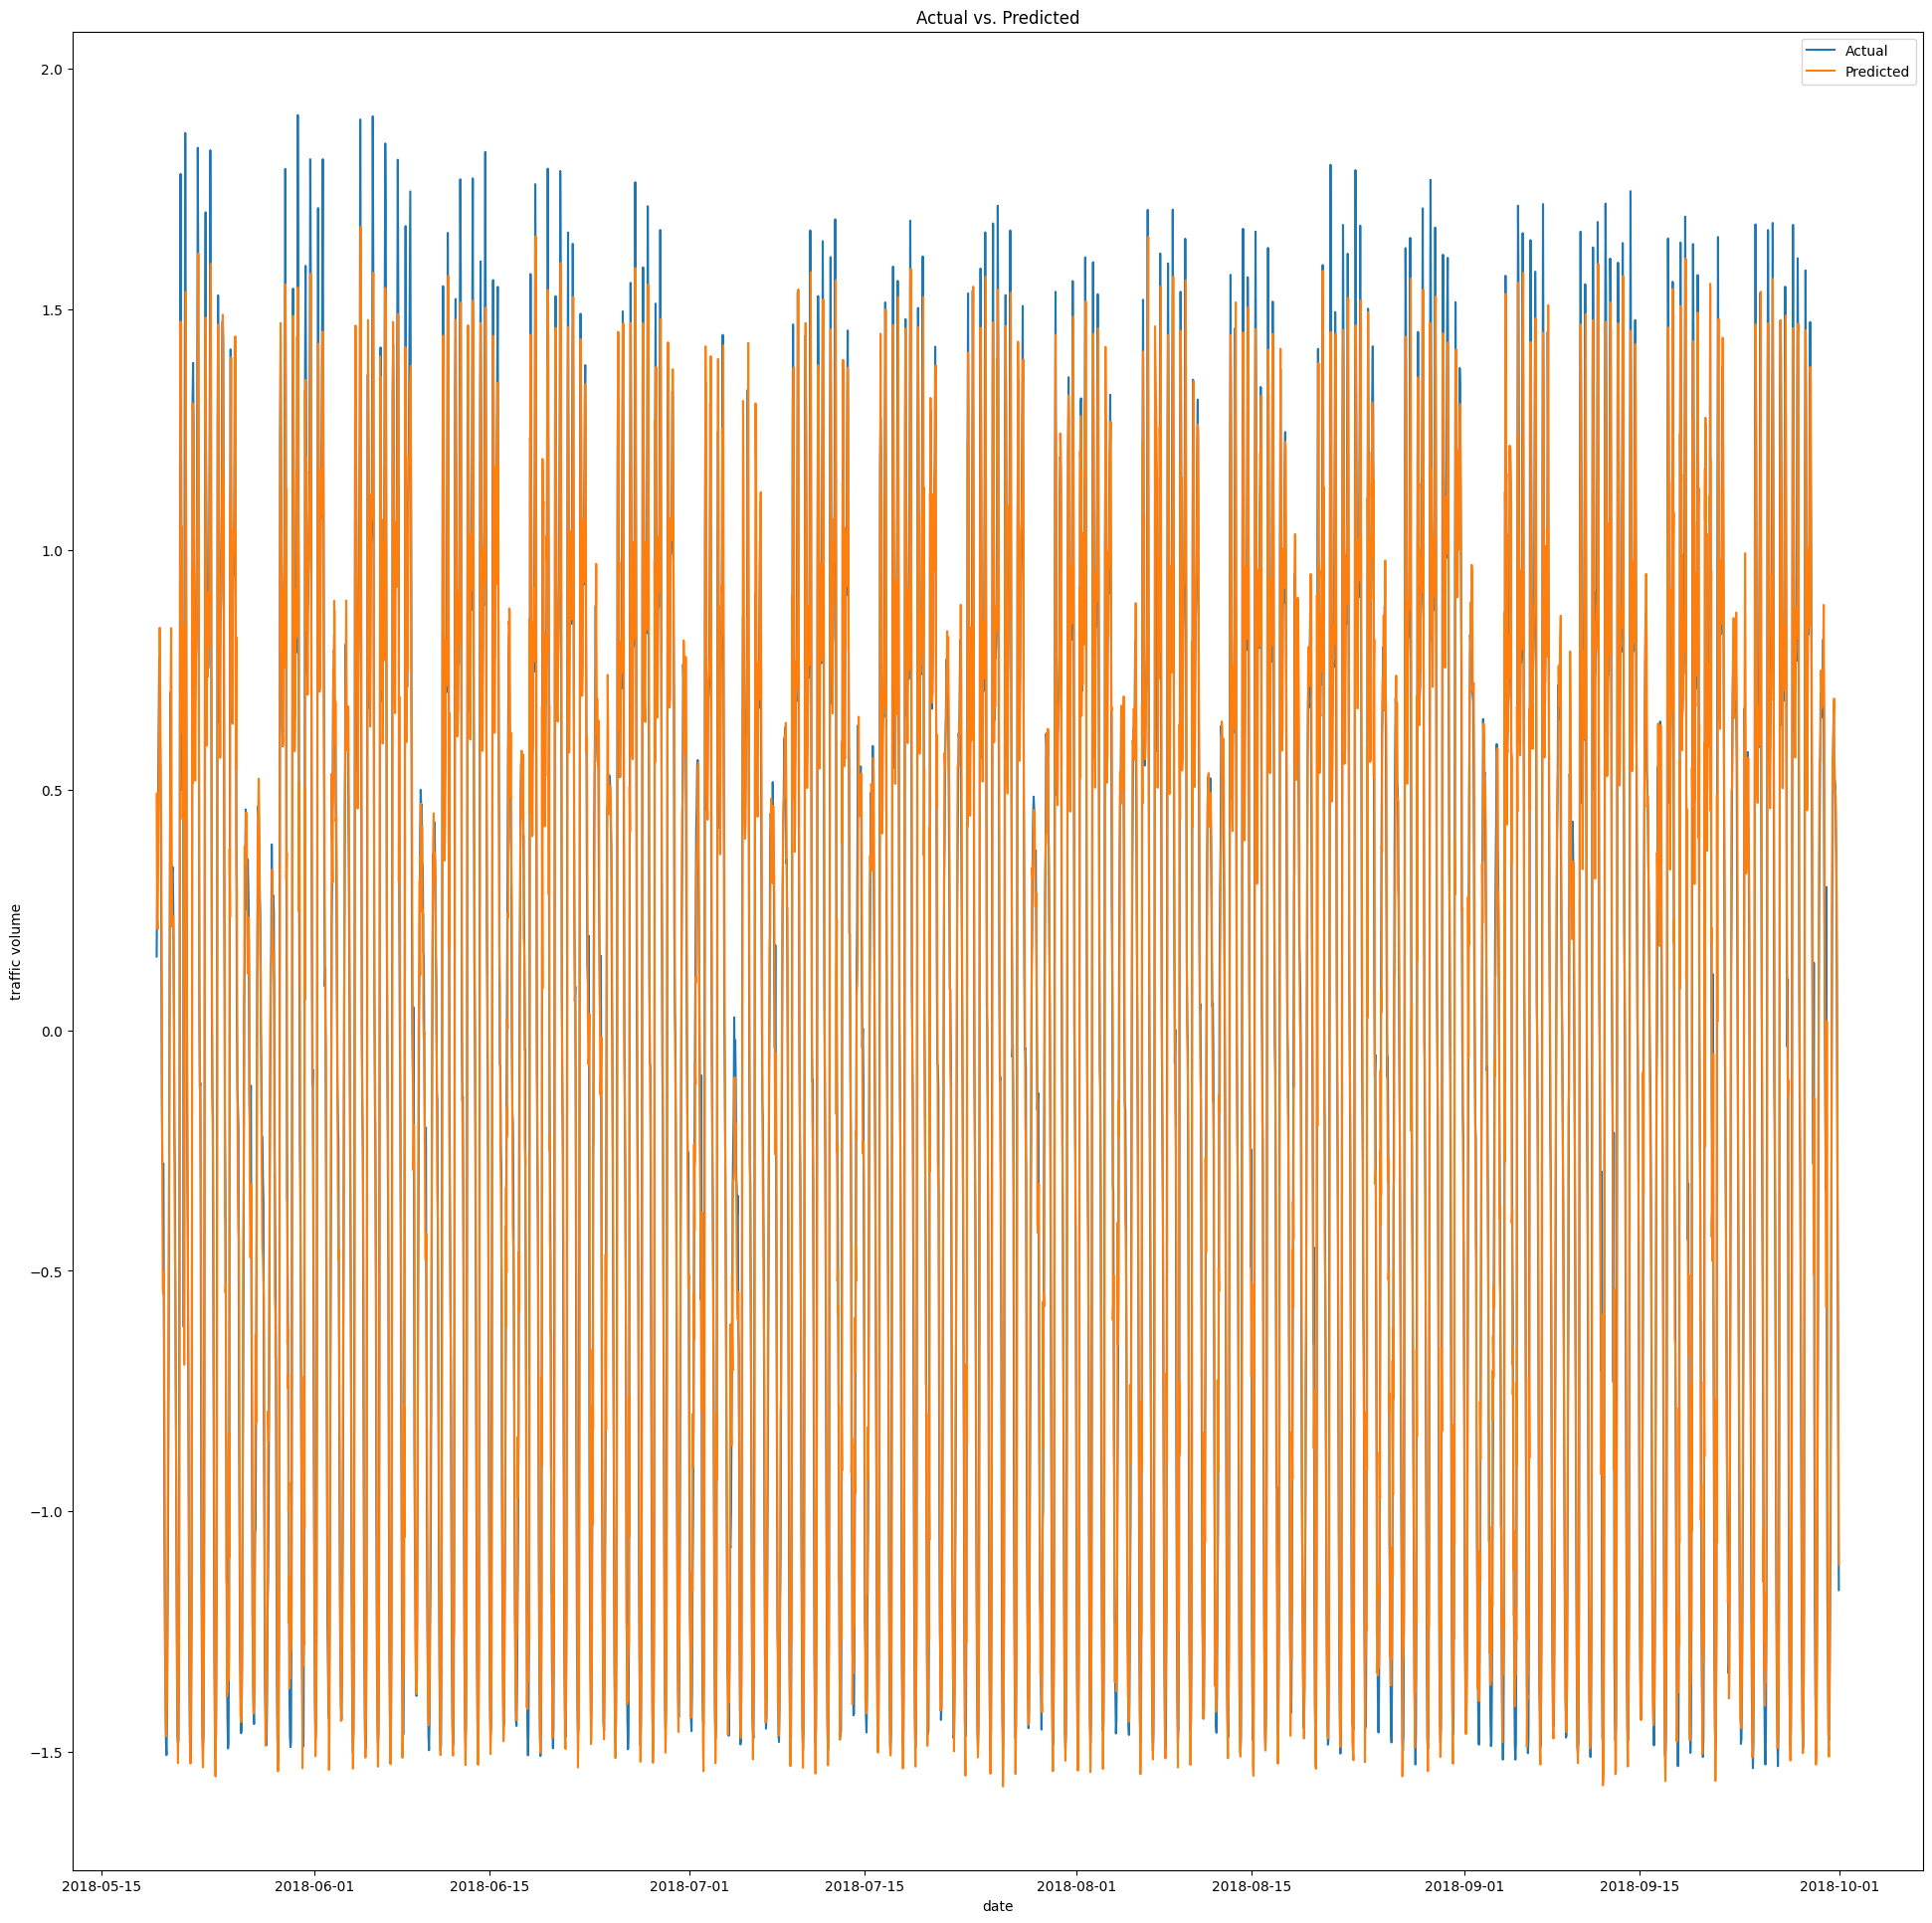

In [983]:
plt.figure(figsize=(24,24))
plt.plot(test_data.index[n_past:], y_test, label='Actual')
plt.plot(test_data.index[n_past:], pred, label='Predicted')
plt.xlabel('date')
plt.ylabel('traffic volume')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1.for handling missing values i decided to fill them after sorting using backward and forward fill incase any nulls were first, i also removed all the duplicates since them give the same info, i dropped the describe column and just kept the main since they had the same info.I also had to do endoing for it and i decided to choose label encoder since it can be ranked or classified from most severe to lease and so on.I also used standard scaler for my scaling and i think i might get better results using min max scaler.

2.yes i did add columns to my data such as the prev volume using shift and i also extracted from the time , the month , day of week and day of year.these give the model more details and features to learn from

3.i used the same architecture for both models just to be a fair comparison, i didnt have much time to experiment with the models architecture but i tried adding and removing some dropout layers since i was thinking there is some overfitting, but i would like to experiment more with the architecture i think i could get better results

4.for the training process i tried 3 batch sizes and chose the one that gave me the best results, also for the epoch i tried different numbers i also tried callback but it didnt improve my model so i stuck with the epoch that gave me the best result

5.for the metrics i used mea and mse since they are what is commonly used in forecasting

6.for the tuning i jyst adjusted during training the batch size and epochs

7. i dont see that the model is overfit but at the same time i think it needs improvement the validation loss is starting low which is what i am concerned about

8.for future improvement i would like to do a callback and also experiment with the models architecture.